In [ ]:
# DATA COLLECTION

In [1]:

import os, sys

base_path = r'C:\Users\Akash Deep\OneDrive - KONAAI Data Sciences Corp\Documents\KonaAI_ML\code'

if base_path not in sys.path:
    sys.path.insert(0, base_path)
    

from src.p2p.run_anomaly import download_data
import dask.dataframe as dd
import re
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Inv_rul = "Analytics.Invoices"
Inv_ml = "Analytics.InvoiceAnomaly"
pay_rul = "Analytics.Payments"
pay_ml = "Analytics.PaymentsAnomaly"
po_rul = "Analytics.PurchaseOrders"
po_ml = "Analytics.PurchaseOrderAnomaly"
demo = False

In [3]:
Inv_rul = download_data(table=Inv_rul, demo=demo)

|2023-10-31 17:44:14|INFO| 432c84a4-0839-5bd4-9933-875d201a570d| Creating connection string |db_mgmt.py|set_connection_string|44
|2023-10-31 17:44:14|INFO| 432c84a4-0839-5bd4-9933-875d201a570d| Downloading data from table Analytics.Invoices |run_anomaly.py|download_data|177
|2023-10-31 17:44:20|INFO| 432c84a4-0839-5bd4-9933-875d201a570d| Connected to database |db_mgmt.py|is_db_connected|109
|2023-10-31 17:44:20|INFO| 432c84a4-0839-5bd4-9933-875d201a570d| Starting to download data from table: Analytics.Invoices |db_mgmt.py|download_table_or_query|153
C:\Users\Akash Deep\OneDrive - KONAAI Data Sciences Corp\Documents\KonaAI_ML\code\src\utils\db_mgmt.py:156: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(
|2023-10-31 17:44:21|INFO| 432c84a4-0839-5bd4-9933-875d201a570d| Generating new directory |file_mgmt.py|get_new_d

In [4]:
# Inv_ml = download_data(table=Inv_ml, demo=demo)

In [5]:
# pay_rul = download_data(table=pay_rul, demo=demo)

In [6]:
# pay_ml = download_data(table=pay_ml, demo=demo)

In [7]:
# po_rul = download_data(table=po_rul, demo=demo)

In [8]:
# po_ml = download_data(table=po_ml, demo=demo)

In [9]:
Inv_rul_df = dd.read_parquet(Inv_rul)

In [10]:
Inv_rul_df.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 230982 entries, 0 to 30981
Data columns (total 172 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   VendorNumber                      230982 non-null      object
 1   CompanyCode                       230982 non-null      object
 2   G/LIndicator                      230982 non-null      object
 3   OriginalInvoiceNo                 230982 non-null      object
 4   PhysicalInvoiceNo                 230982 non-null      object
 5   SystemInvoiceNo                   230982 non-null      object
 6   FiscalYear                        230982 non-null      object
 7   RefNo                             230982 non-null      object
 8   InvoiceStatus                     230982 non-null      object
 9   Country                           230982 non-null      object
10   DateDocumented                    230982 non-null      object
11   CapturedBy             

In [11]:
Inv_rul_df.columns

Index(['VendorNumber', 'CompanyCode', 'G/LIndicator', 'OriginalInvoiceNo',
       'PhysicalInvoiceNo', 'SystemInvoiceNo', 'FiscalYear', 'RefNo',
       'InvoiceStatus', 'Country',
       ...
       'FMP2P1004', 'FMP2P1005', 'FMP2P1006', 'FMP2P1140', 'FMP2P1022',
       'FMP2P1021', 'FMP2P1040', 'FMP2P1024', 'FMP2P1023', 'FMP2P1025'],
      dtype='object', length=172)

In [12]:
list(Inv_rul_df.columns)

['VendorNumber',
 'CompanyCode',
 'G/LIndicator',
 'OriginalInvoiceNo',
 'PhysicalInvoiceNo',
 'SystemInvoiceNo',
 'FiscalYear',
 'RefNo',
 'InvoiceStatus',
 'Country',
 'DateDocumented',
 'CapturedBy',
 'DateCaptured',
 'AuthorizedBy',
 'DateAuthorized',
 'AmountVat_LC',
 'AmountIncl_LC',
 'AmountExcl_LC',
 'ReferenceCurrency',
 'AmountVat_OC',
 'AmountIncl_OC',
 'AmountExcl_OC',
 'InvoiceDescription',
 'Debit/CreditIndicator',
 'PostingKey',
 'PaymentType',
 'PaymentNumber',
 'PaymentDate',
 'PaymentAmount',
 'VendorName',
 'DueDate',
 'ScheduledPayDate',
 'InvoiceType',
 'InvoiceLineRef',
 'VoucherNumber',
 'SPT_Source',
 'SPT_RowID',
 'CaseFlag',
 'CaseRowID',
 'IsFalsePositive',
 'IntercompanyFlag',
 'ExcludeVendor',
 'GL_Account',
 'GL_Account_Description',
 'FMP2P001',
 'FMP2P002',
 'FMP2P003',
 'FMP2P004',
 'FMP2P005',
 'FMP2P006',
 'FMP2P007',
 'FMP2P008',
 'FMP2P009',
 'FMP2P010',
 'FMP2P011',
 'FMP2P012',
 'FMP2P013',
 'FMP2P014',
 'FMP2P015',
 'FMP2P016',
 'FMP2P017',
 'FMP

In [13]:
idf = Inv_rul_df[['SPT_RowID',
 'FMP2P001_Tran_Score',
 'FMP2P002_Tran_Score',
 'FMP2P003_Tran_Score',
 'FMP2P004_Tran_Score',
 'FMP2P005_Tran_Score',
 'FMP2P006_Tran_Score',
 'FMP2P007_Tran_Score',
 'FMP2P008_Tran_Score',
 'FMP2P009_Tran_Score',
 'FMP2P010_Tran_Score',
 'FMP2P011_Tran_Score',
 'FMP2P012_Tran_Score',
 'FMP2P013_Tran_Score',
 'FMP2P014_Tran_Score',
 'FMP2P015_Tran_Score',
 'FMP2P016_Tran_Score',
 'FMP2P017_Tran_Score',
 'FMP2P018_Tran_Score',
 'FMP2P019_Tran_Score',
 'FMP2P020_Tran_Score',
 'FMP2P1001',
 'FMP2P1002',
 'FMP2P1003',
 'FMP2P1004',
 'FMP2P1005',
 'FMP2P1006',
 'FMP2P1007',
 'FMP2P1008',
 'FMP2P1009',
 'FMP2P1010',
 'FMP2P1011',
 'FMP2P1012',
 'FMP2P1013',
 'FMP2P1014',
 'FMP2P1015',
 'FMP2P1016',
 'FMP2P1017',
 'FMP2P1018',
 'FMP2P1019',
 'FMP2P1020',
 'FMP2P1021',
 'FMP2P1022',
 'FMP2P1023',
 'FMP2P1024',
 'FMP2P1025',
 'FMP2P1026',
 'FMP2P1027',
 'FMP2P1028',
 'FMP2P1029',
 'FMP2P1030',
 'FMP2P1031',
 'FMP2P1032',
 'FMP2P1033',
 'FMP2P1034',
 'FMP2P1035',
 'FMP2P1036',
 'FMP2P1037',
 'FMP2P1038',
 'FMP2P1039',
 'FMP2P1040']]

In [14]:
idf.head()

,SPT_RowID,FMP2P001_Tran_Score,FMP2P002_Tran_Score,FMP2P003_Tran_Score,FMP2P004_Tran_Score,FMP2P005_Tran_Score,FMP2P006_Tran_Score,FMP2P007_Tran_Score,FMP2P008_Tran_Score,FMP2P009_Tran_Score,...,FMP2P1031,FMP2P1032,FMP2P1033,FMP2P1034,FMP2P1035,FMP2P1036,FMP2P1037,FMP2P1038,FMP2P1039,FMP2P1040
0,4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,4596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
idf.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 230982 entries, 0 to 30981
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SPT_RowID            230982 non-null      int64
 1   FMP2P001_Tran_Score  230982 non-null      float64
 2   FMP2P002_Tran_Score  230982 non-null      float64
 3   FMP2P003_Tran_Score  230982 non-null      float64
 4   FMP2P004_Tran_Score  230982 non-null      float64
 5   FMP2P005_Tran_Score  230982 non-null      float64
 6   FMP2P006_Tran_Score  230982 non-null      float64
 7   FMP2P007_Tran_Score  230982 non-null      float64
 8   FMP2P008_Tran_Score  230982 non-null      float64
 9   FMP2P009_Tran_Score  230982 non-null      float64
10   FMP2P010_Tran_Score  230982 non-null      float64
11   FMP2P011_Tran_Score  230982 non-null      float64
12   FMP2P012_Tran_Score  230982 non-null      float64
13   FMP2P013_Tran_Score  230982 non-null      float64
14   FMP2P014_Tran_Score

In [16]:
idf.describe()

,SPT_RowID,FMP2P001_Tran_Score,FMP2P002_Tran_Score,FMP2P003_Tran_Score,FMP2P004_Tran_Score,FMP2P005_Tran_Score,FMP2P006_Tran_Score,FMP2P007_Tran_Score,FMP2P008_Tran_Score,FMP2P009_Tran_Score,FMP2P010_Tran_Score,FMP2P011_Tran_Score,FMP2P012_Tran_Score,FMP2P013_Tran_Score,FMP2P014_Tran_Score,FMP2P015_Tran_Score,FMP2P016_Tran_Score,FMP2P017_Tran_Score,FMP2P018_Tran_Score,FMP2P019_Tran_Score,FMP2P020_Tran_Score,FMP2P1001,FMP2P1002,FMP2P1003,FMP2P1004,FMP2P1005,FMP2P1006,FMP2P1007,FMP2P1008,FMP2P1009,FMP2P1010,FMP2P1011,FMP2P1012,FMP2P1013,FMP2P1014,FMP2P1015,FMP2P1016,FMP2P1017,FMP2P1018,FMP2P1019,FMP2P1020,FMP2P1021,FMP2P1022,FMP2P1026,FMP2P1027,FMP2P1028,FMP2P1029,FMP2P1030,FMP2P1031,FMP2P1032,FMP2P1033,FMP2P1034,FMP2P1035,FMP2P1036,FMP2P1037,FMP2P1038,FMP2P1039,FMP2P1040
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [17]:
idff = idf.compute()

In [18]:
ot = (idff.describe()).T

In [19]:
ot

,count,mean,std,min,25%,50%,75%,max
SPT_RowID,230982.0,181831.575374,98028.877590,1.0,100695.2500,196023.50,264227.75,332276.00
FMP2P001_Tran_Score,230982.0,1.219546,7.080316,0.0,0.0000,0.00,0.00,70.00
FMP2P002_Tran_Score,230982.0,0.016740,0.800352,0.0,0.0000,0.00,0.00,57.00
FMP2P003_Tran_Score,230982.0,0.000000,0.000000,0.0,0.0000,0.00,0.00,0.00
FMP2P004_Tran_Score,230982.0,0.000000,0.000000,0.0,0.0000,0.00,0.00,0.00
FMP2P005_Tran_Score,230982.0,0.004546,0.428286,0.0,0.0000,0.00,0.00,60.00
FMP2P006_Tran_Score,230982.0,1.463324,5.886575,0.0,0.0000,0.00,0.00,40.00
FMP2P007_Tran_Score,230982.0,0.010451,0.518891,0.0,0.0000,0.00,0.00,37.00
FMP2P008_Tran_Score,230982.0,0.002994,0.268663,0.0,0.0000,0.00,0.00,37.00
FMP2P009_Tran_Score,230982.0,0.005384,0.380302,0.0,0.0000,0.00,0.00,37.00


In [20]:
ot.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [21]:
ot = ot.drop(columns=['mean','min','25%', '50%', '75%', 'max'])

In [22]:
tc = ot.loc['SPT_RowID','count']
ot['null%'] = ((tc-ot['count'])/tc)*100

In [23]:
ot

,count,std,null%
SPT_RowID,230982.0,98028.877590,0.000000
FMP2P001_Tran_Score,230982.0,7.080316,0.000000
FMP2P002_Tran_Score,230982.0,0.800352,0.000000
FMP2P003_Tran_Score,230982.0,0.000000,0.000000
FMP2P004_Tran_Score,230982.0,0.000000,0.000000
FMP2P005_Tran_Score,230982.0,0.428286,0.000000
FMP2P006_Tran_Score,230982.0,5.886575,0.000000
FMP2P007_Tran_Score,230982.0,0.518891,0.000000
FMP2P008_Tran_Score,230982.0,0.268663,0.000000
FMP2P009_Tran_Score,230982.0,0.380302,0.000000


In [24]:
con_col = ot[ot['std']<0.1].index

In [25]:
con_col

Index(['FMP2P003_Tran_Score', 'FMP2P004_Tran_Score', 'FMP2P012_Tran_Score',
       'FMP2P019_Tran_Score', 'FMP2P020_Tran_Score', 'FMP2P1001', 'FMP2P1003',
       'FMP2P1005', 'FMP2P1007', 'FMP2P1009', 'FMP2P1011', 'FMP2P1013',
       'FMP2P1015', 'FMP2P1017', 'FMP2P1019', 'FMP2P1021', 'FMP2P1033',
       'FMP2P1036', 'FMP2P1037', 'FMP2P1039'],
      dtype='object')

In [26]:
con_col

Index(['FMP2P003_Tran_Score', 'FMP2P004_Tran_Score', 'FMP2P012_Tran_Score',
       'FMP2P019_Tran_Score', 'FMP2P020_Tran_Score', 'FMP2P1001', 'FMP2P1003',
       'FMP2P1005', 'FMP2P1007', 'FMP2P1009', 'FMP2P1011', 'FMP2P1013',
       'FMP2P1015', 'FMP2P1017', 'FMP2P1019', 'FMP2P1021', 'FMP2P1033',
       'FMP2P1036', 'FMP2P1037', 'FMP2P1039'],
      dtype='object')

In [27]:
corr_matrix = idf.corr()

c:\Users\Akash Deep\OneDrive - KONAAI Data Sciences Corp\Documents\KonaAI_ML\.venv\lib\site-packages\dask\dataframe\core.py:7368: FutureWarning: The default value of numeric_only will be `False` in a future version of Dask.
  warnings.warn(


In [28]:
corr_array = corr_matrix.compute()

ValueError: The columns in the computed data do not match the columns in the provided metadata
  Extra:   []
  Missing: ['FMP2P1001', 'FMP2P1002', 'FMP2P1003', 'FMP2P1004', 'FMP2P1005', 'FMP2P1006', 'FMP2P1007', 'FMP2P1008', 'FMP2P1009', 'FMP2P1010', 'FMP2P1011', 'FMP2P1012', 'FMP2P1013', 'FMP2P1014', 'FMP2P1015', 'FMP2P1016', 'FMP2P1017', 'FMP2P1018', 'FMP2P1019', 'FMP2P1020', 'FMP2P1021', 'FMP2P1022', 'FMP2P1026', 'FMP2P1027', 'FMP2P1028', 'FMP2P1029', 'FMP2P1030', 'FMP2P1031', 'FMP2P1032', 'FMP2P1033', 'FMP2P1034', 'FMP2P1035', 'FMP2P1036', 'FMP2P1037', 'FMP2P1038', 'FMP2P1039', 'FMP2P1040']

In [ ]:
def data_clean(ddf):
    # pdf = ddf.compute()
    # ot = (pdf.describe()).T
    # ot = ot.drop(columns=['mean','min','25%', '50%', '75%', 'max'])
    # tc = ot.loc['SPT_RowID','count']
    # ot['null%'] = ((tc-ot['count'])/tc)*100
    # print(ot)
    # con_col = ot[ot['std']<0.1].index
    # nul_col = ot[ot['null%']>99].index
    # df = ddf.drop(columns=[con_col])
    # ddf = df.drop(columns=[nul_col])
    # return ddf

    std_devs = ddf.std()

    std_devs = std_devs.compute()

    low_std_cols = [col for col, std in std_devs.items() if std < 0.1]

    return ddf.drop(columns=low_std_cols)
    


In [ ]:
data_clean(idf)

In [ ]:
import dask.dataframe as dd


def data_clean(ddf):
  """
  This function takes a Dask DataFrame as input and returns a Dask DataFrame with the following changes:
    * Calculates the null value count, null value parentage, and standard deviation of each column
    * Drops the columns that have standard deviation value less than 0.1 and null count parentage is more than 99.7%
  Args:
    ddf: A Dask DataFrame
  Returns:
    A Dask DataFrame with the above changes
  """

  # Calculate the null value count, null value parentage, and standard deviation of each column
  null_count = ddf.isnull().sum()
  null_count_parentage = null_count / ddf.shape[0] * 100
  std = ddf.std()

  # Create a new Dask DataFrame with the above information
  ot = dd.DataFrame({'null_count': null_count, 'null_count_parentage': null_count_parentage, 'std': std})

  # Drop the columns that have standard deviation value less than 0.1 and null count parentage is more than 99.7%
  con_col = ot[ot['std']<0.1].index
  nul_col = ot[ot['null_count_parentage']>99.7].index
  ddf = ddf.drop(con_col)
  ddf = ddf.drop(nul_col)

  return ddf

In [ ]:
data_clean(idf)

In [ ]:
import dask.dataframe as dd
import pandas as pd

def process_dask_dataframe(df):
    # Calculate null value count and null value percentage for each column
    null_count = df.isna().sum().compute()
    total_count = len(df)
    null_percentage = (null_count / total_count) * 100

    # Calculate standard deviation for each column
    std_deviation = df.std().compute()

    # Create a mask to filter columns based on the conditions
    mask = (std_deviation >= 0.1) | (null_percentage <= 99.7)

    # Select only columns that meet the conditions
    filtered_df = df.loc[:, mask]

    return filtered_df

In [ ]:
process_dask_dataframe(idf)

In [ ]:
def data_clean(ddf):
  """
  This function takes a Dask DataFrame as input and returns a Dask DataFrame with the following changes:
    * Calculates the null value count, null value parentage, and standard deviation of each column
    * Drops the columns that have standard deviation value less than 0.1 and null count parentage is more than 99.7%
  Args:
    ddf: A Dask DataFrame
  Returns:
    A Dask DataFrame with the above changes
  """

  # Calculate the null value count, null value parentage, and standard deviation of each column
  null_count = ddf.isnull().sum()
  null_count_parentage = null_count / ddf.shape[0] * 100
  std = ddf.std()

  # Create a new Dask DataFrame with the above information
  ot = dd.DataFrame({'null_count': null_count,
                   'null_count_parentage': null_count_parentage,
                   'std': std},
                  name='my_dataframe',
                  meta={'null_count': 'int64',
                        'null_count_parentage': 'int64',
                        'std': 'float64'},
                  divisions=[0, 3])

  # Drop the columns that have standard deviation value less than 0.1 and null count parentage is more than 99.7%
  con_col = ot[ot['std']<0.1].index
  nul_col = ot[ot['null_count_parentage']>99.7].index
  ddf = ddf.drop([con_col])
  ddf = ddf.drop(columns=[nul_col])

  return ddf

In [ ]:
data_clean(idf)

In [ ]:
con_col

In [ ]:
type(con_col)

In [ ]:
idf[con_col].info(verbose=True)

In [ ]:
idf.head()

In [29]:
# Add a new column with the sum of all columns for each row
idf = idf.assign(Sum=idf.sum(axis=1))

# Compute the result
idf.compute()

c:\Users\Akash Deep\OneDrive - KONAAI Data Sciences Corp\Documents\KonaAI_ML\.venv\lib\site-packages\dask\dataframe\core.py:2123: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meta = getattr(self._meta_nonempty, name)(


,SPT_RowID,FMP2P001_Tran_Score,FMP2P002_Tran_Score,FMP2P003_Tran_Score,FMP2P004_Tran_Score,FMP2P005_Tran_Score,FMP2P006_Tran_Score,FMP2P007_Tran_Score,FMP2P008_Tran_Score,FMP2P009_Tran_Score,...,FMP2P1032,FMP2P1033,FMP2P1034,FMP2P1035,FMP2P1036,FMP2P1037,FMP2P1038,FMP2P1039,FMP2P1040,Sum
0,4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4613.00
1,4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4614.00
2,4596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4615.00
3,4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4616.00
4,4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4609.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30977,330314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330314.00
30978,330315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330315.00
30979,330316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330385.02
30980,330317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330317.00


In [30]:
idf['Sum'].compute().describe()

count    230982.000000
mean     181835.475685
std       98028.766614
min           5.000000
25%      100695.250000
50%      196024.500000
75%      264235.750000
max      332335.070000
Name: Sum, dtype: float64

In [31]:
idf = idf.fillna(0)

In [32]:
idf['label'] = idf['Sum'].apply(lambda x: 1 if x > 181835 else 0)

c:\Users\Akash Deep\OneDrive - KONAAI Data Sciences Corp\Documents\KonaAI_ML\.venv\lib\site-packages\dask\dataframe\core.py:4419: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Sum', 'int64'))

  warnings.warn(meta_warning(meta))


In [33]:
idf.head()

,SPT_RowID,FMP2P001_Tran_Score,FMP2P002_Tran_Score,FMP2P003_Tran_Score,FMP2P004_Tran_Score,FMP2P005_Tran_Score,FMP2P006_Tran_Score,FMP2P007_Tran_Score,FMP2P008_Tran_Score,FMP2P009_Tran_Score,...,FMP2P1033,FMP2P1034,FMP2P1035,FMP2P1036,FMP2P1037,FMP2P1038,FMP2P1039,FMP2P1040,Sum,label
0,4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4613.00,0
1,4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4614.00,0
2,4596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4615.00,0
3,4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4616.00,0
4,4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4609.56,0


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

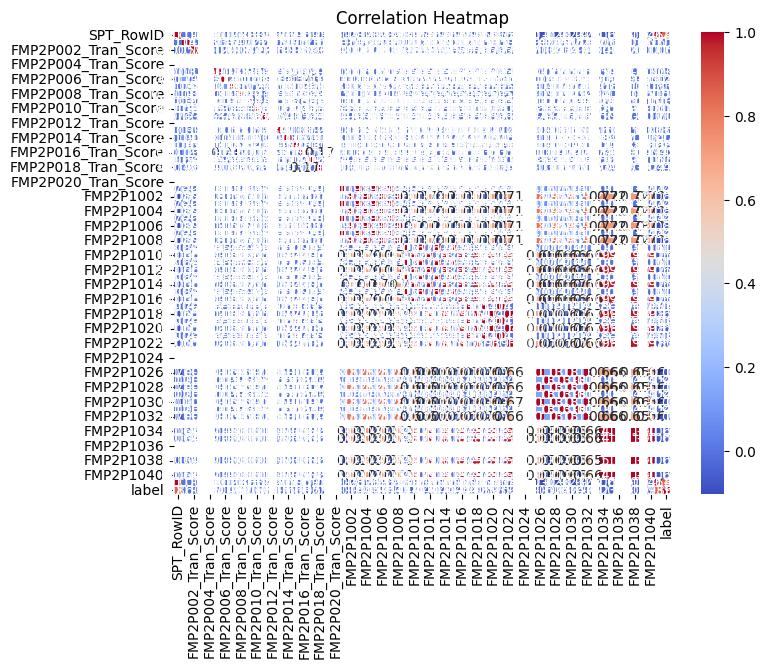

In [35]:
# Convert Dask DataFrame to Pandas DataFrame
pdf = idf.compute()

# Calculate the correlation matrix
correlation_matrix = pdf.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

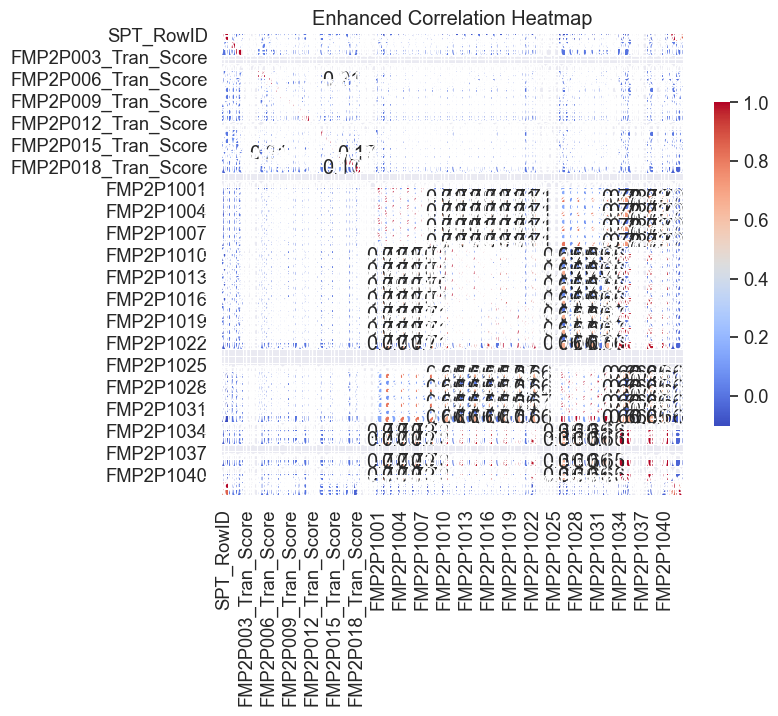

In [36]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={'shrink': 0.7})
plt.title('Enhanced Correlation Heatmap')
plt.show()

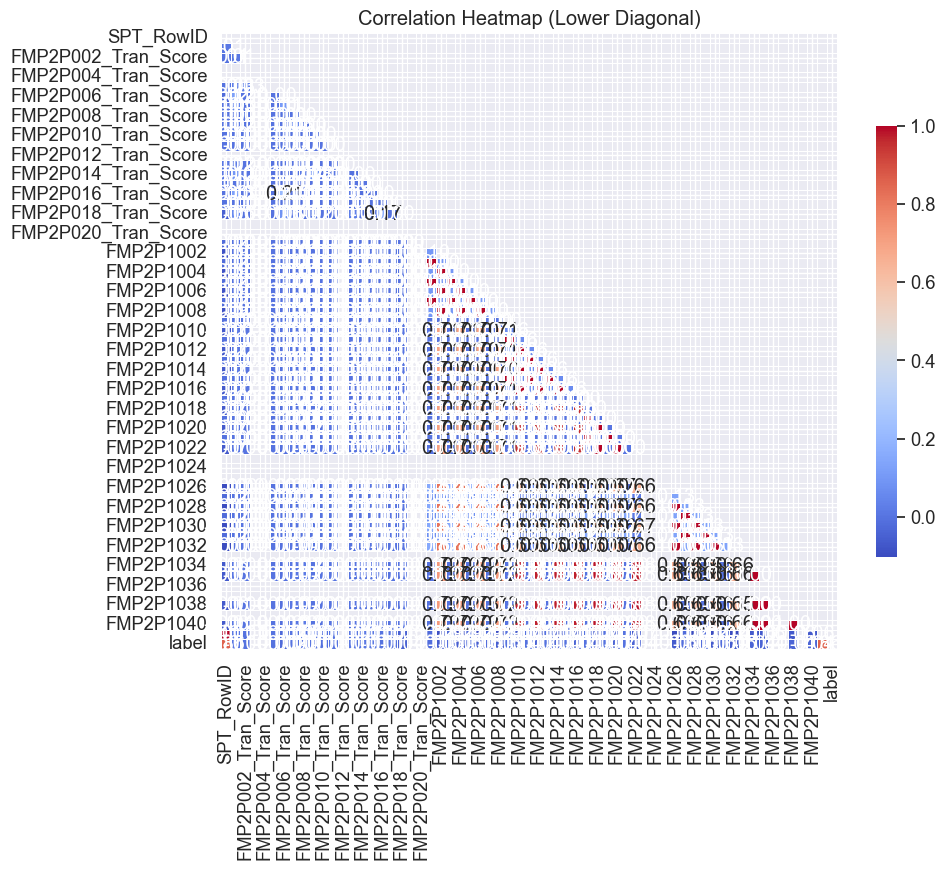

In [37]:
# Create a mask for the lower diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the upper triangle values to NaN to hide them
correlation_matrix = correlation_matrix.mask(mask)

# Create a correlation heatmap with only the lower diagonal
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={'shrink': 0.7})
plt.title('Correlation Heatmap (Lower Diagonal)')
plt.show()

In [38]:
import plotly.express as px

In [39]:
# pip install plotly

In [40]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the upper triangle values to NaN to hide them
correlation_matrix = correlation_matrix.where(~mask, np.nan)

# Create a correlation heatmap with only the lower diagonal using Plotly
fig = px.imshow(correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.columns)
fig.update_layout(title='Correlation Heatmap (Lower Diagonal)')
fig.show()

In [ ]:
import sweetviz as sv
report = sv.analyze(idff)
report.show_html()

In [ ]:
report

In [ ]:
%pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(idff, title="Pandas Profiling Report")

In [ ]:
profile

In [ ]:
profile.to_notebook_iframe()

MODEL BUILDING

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
pdf

,SPT_RowID,FMP2P001_Tran_Score,FMP2P002_Tran_Score,FMP2P003_Tran_Score,FMP2P004_Tran_Score,FMP2P005_Tran_Score,FMP2P006_Tran_Score,FMP2P007_Tran_Score,FMP2P008_Tran_Score,FMP2P009_Tran_Score,...,FMP2P1033,FMP2P1034,FMP2P1035,FMP2P1036,FMP2P1037,FMP2P1038,FMP2P1039,FMP2P1040,Sum,label
0,4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4613.00,0
1,4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4614.00,0
2,4596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4615.00,0
3,4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4616.00,0
4,4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4609.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30977,330314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330314.00,1
30978,330315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330315.00,1
30979,330316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330385.02,1
30980,330317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330317.00,1


In [43]:
pdf.drop('SPT_RowID',axis=1,inplace=True)

In [44]:
pdf

,FMP2P001_Tran_Score,FMP2P002_Tran_Score,FMP2P003_Tran_Score,FMP2P004_Tran_Score,FMP2P005_Tran_Score,FMP2P006_Tran_Score,FMP2P007_Tran_Score,FMP2P008_Tran_Score,FMP2P009_Tran_Score,FMP2P010_Tran_Score,...,FMP2P1033,FMP2P1034,FMP2P1035,FMP2P1036,FMP2P1037,FMP2P1038,FMP2P1039,FMP2P1040,Sum,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4613.00,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4614.00,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4615.00,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4616.00,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4609.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330314.00,1
30978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330315.00,1
30979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330385.02,1
30980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330317.00,1


In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression())]

In [49]:
pdf.shape

(230982, 62)

In [48]:
#Seperate train and test data
X_train, X_test, y_train, y_test = train_test_split(pdf.iloc[:,:-1].values,
                                                   pdf['label'],
                                                   test_size = 0.4,
                                                   random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(138589, 61)
(92393, 61)
(138589,)
(92393,)


In [ ]:
X_train

In [ ]:
X_test

In [50]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([1.11799884, 1.12975073, 1.12649655, 1.05039763, 1.03730202]),
 'score_time': array([0.01297426, 0.01399469, 0.01599598, 0.02253056, 0.03300691]),
 'test_score': array([0.99920629, 0.9990259 , 0.9993506 , 0.99920629, 0.99945882])}

In [51]:
scores['test_score'].mean()

0.9992495812022216

In [52]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  1.076421594619751
fit_time  std  0.2588700966977648
score_time  mean  0.01831340789794922
score_time  std  0.00578392350262075
test_score  mean  0.9992495812022216
test_score  std  0.000146808706464068
---------------------------------
SVC()
-----------------------------------
fit_time  mean  87.36773562431335
fit_time  std  20.59701590198841
score_time  mean  13.671559810638428
score_time  std  0.5588732780111905
test_score  mean  0.996334489220955
test_score  std  0.0004960139697651047
---------------------------------
SVC()
-----------------------------------
fit_time  mean  91.5015974998474
fit_time  std  43.1710687210257
score_time  mean  14.82473111152649
score_time  std  3.6839291350446994
test_score  mean  0.996334489220955
test_score  std  0.0004960139697651047
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_ti

In [ ]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= SVC())
pipeline.steps

[('normalizer', StandardScaler()), ('clf', SVC())]

In [ ]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf'],
    'clf__C' : np.linspace(0.1,1.2,12)
})

cv_grid.fit(X_train, y_train)

In [ ]:
cv_grid.best_params_

: 

In [ ]:
cv_grid.best_estimator_

In [ ]:
cv_grid.best_score_

In [ ]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))